In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
# !pip install -r requirements.txt

#### Load in Nips dataframes and embeddings

In [7]:
import bert
import samples
import sklearn.mixture
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as  plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from utils import *
import pdb
import umap
import hdbscan


from numpy import dot
from numpy.linalg import norm
from sklearn.metrics import silhouette_score


#### Pick a dim and clustering method to cluster the embeddings

In [8]:
# Data loading
years = ["2018", "2019", "2022"]
nips_df = pd.read_csv(f"nips_{years[0]}_clean2.csv")
embeddings = load_embeddings(f"outputs/clean2_nips_{years[0]}_embeddings.pkl")
for year in years[1:]:
    current_df = pd.read_csv(f"nips_{year}_clean2.csv")
    nips_df = pd.concat([nips_df, current_df], ignore_index=True)
    del current_df
    current_embeddings = load_embeddings(f"outputs/clean2_nips_{year}_embeddings.pkl")
    embeddings = np.append(embeddings, current_embeddings, axis=0)
    del current_embeddings
    
nips_df

,Unnamed: 0,title,authors,abstract,year
0,0,Synthesized Policies for Transfer and Adaptati...,"Hexiang Hu, Liyu Chen, Boqing Gong, Fei Sha",The ability to transfer in reinforcement learn...,2018
1,1,Self-Supervised Generation of Spatial Audio fo...,"Pedro Morgado, Nuno Nvasconcelos, Timothy Lang...",We introduce an approach to convert mono audio...,2018
2,2,On GANs and GMMs,"Eitan Richardson, Yair Weiss",A longstanding problem in machine learning is ...,2018
3,3,Batch-Instance Normalization for Adaptively St...,"Hyeonseob Nam, Hyo-Eun Kim",Real-world image recognition is often challeng...,2018
4,4,Hierarchical Reinforcement Learning for Zero-s...,"Sungryull Sohn, Junhyuk Oh, Honglak Lee",We introduce a new RL problem where the agent ...,2018
...,...,...,...,...,...
4502,2619,Cost-efficient Gaussian tensor network embeddi...,"Linjian Ma, Edgar Solomonik","This work discusses tensor network embeddings,...",2022
4503,2620,Neural Transmitted Radiance Fields,"Chengxuan Zhu, Renjie Wan, Boxin Shi",Neural radiance fields (NeRF) have brought tre...,2022
4504,2622,Structural Kernel Search via Bayesian Optimiza...,"Matthias Bitzer, Mona Meister, Christoph Zimmer",Despite recent advances in automated machine l...,2022
4505,2623,Near-Optimal No-Regret Learning Dynamics for G...,"Gabriele Farina, Ioannis Anagnostides, Haipeng...",A recent line of work has established un...,2022


In [9]:
nips_df.head()

,Unnamed: 0,title,authors,abstract,year
0,0,Synthesized Policies for Transfer and Adaptati...,"Hexiang Hu, Liyu Chen, Boqing Gong, Fei Sha",The ability to transfer in reinforcement learn...,2018
1,1,Self-Supervised Generation of Spatial Audio fo...,"Pedro Morgado, Nuno Nvasconcelos, Timothy Lang...",We introduce an approach to convert mono audio...,2018
2,2,On GANs and GMMs,"Eitan Richardson, Yair Weiss",A longstanding problem in machine learning is ...,2018
3,3,Batch-Instance Normalization for Adaptively St...,"Hyeonseob Nam, Hyo-Eun Kim",Real-world image recognition is often challeng...,2018
4,4,Hierarchical Reinforcement Learning for Zero-s...,"Sungryull Sohn, Junhyuk Oh, Honglak Lee",We introduce a new RL problem where the agent ...,2018


In [10]:
dim_range = [-1] + list(range(5, 750, 50))
num_cluster_range = [5,10,15]
cluster_algorithm = "kmeans"
cluster_models, dim_reduce_models, scores = dim_reduce_train_cluster(embeddings, cluster_algorithm,  "umap", "sil", dim_range=dim_range, num_cluster_range=num_cluster_range, saving_path="outputs/kmeans2")

  0%|          | 0/16 [00:00<?, ?it/s]

0.04396787


0.033583913


  6%|▋         | 1/16 [00:07<01:49,  7.29s/it]

0.027335104


0.2833341


0.26559797


 12%|█▎        | 2/16 [00:38<04:55, 21.08s/it]

0.27483356


0.28339365


0.2613303


 19%|█▉        | 3/16 [00:49<03:39, 16.88s/it]

0.2710046


0.28276


0.2569587


 25%|██▌       | 4/16 [01:01<02:59, 14.93s/it]

0.26243556


0.28351828


0.26003262


 31%|███▏      | 5/16 [01:19<02:54, 15.88s/it]

0.27198112


0.28337806


0.25665733


 38%|███▊      | 6/16 [01:41<02:58, 17.84s/it]

0.26772842


0.28440827


0.26213083


 44%|████▍     | 7/16 [02:08<03:07, 20.84s/it]

0.27032205


0.2835619


0.26187035


 50%|█████     | 8/16 [02:39<03:14, 24.33s/it]

0.26797247


0.2857014


0.25840676


 56%|█████▋    | 9/16 [03:17<03:20, 28.64s/it]

0.2663622


0.2825427


0.2577189


 62%|██████▎   | 10/16 [03:57<03:12, 32.09s/it]

0.2694993


0.28331503


0.25963533


 69%|██████▉   | 11/16 [04:45<03:03, 36.72s/it]

0.27119264


0.28279284


0.25637898


 75%|███████▌  | 12/16 [05:39<02:48, 42.08s/it]

0.2711239


0.2808258


0.26189026


 81%|████████▏ | 13/16 [06:43<02:26, 48.85s/it]

0.2649795


0.2828047


0.26451534


 88%|████████▊ | 14/16 [07:49<01:48, 54.05s/it]

0.2637515


0.28046334


0.25362304


 94%|█████████▍| 15/16 [09:09<01:01, 61.83s/it]

0.2694194


0.28237027


0.26178008


100%|██████████| 16/16 [10:34<00:00, 39.68s/it]

0.26900795


In [11]:
dim_range

[-1, 5, 55, 105, 155, 205, 255, 305, 355, 405, 455, 505, 555, 605, 655, 705]

In [12]:
scores

{(-1, 5): 0.04396787,
 (-1, 10): 0.033583913,
 (-1, 15): 0.027335104,
 (5, 5): 0.2833341,
 (5, 10): 0.26559797,
 (5, 15): 0.27483356,
 (55, 5): 0.28339365,
 (55, 10): 0.2613303,
 (55, 15): 0.2710046,
 (105, 5): 0.28276,
 (105, 10): 0.2569587,
 (105, 15): 0.26243556,
 (155, 5): 0.28351828,
 (155, 10): 0.26003262,
 (155, 15): 0.27198112,
 (205, 5): 0.28337806,
 (205, 10): 0.25665733,
 (205, 15): 0.26772842,
 (255, 5): 0.28440827,
 (255, 10): 0.26213083,
 (255, 15): 0.27032205,
 (305, 5): 0.2835619,
 (305, 10): 0.26187035,
 (305, 15): 0.26797247,
 (355, 5): 0.2857014,
 (355, 10): 0.25840676,
 (355, 15): 0.2663622,
 (405, 5): 0.2825427,
 (405, 10): 0.2577189,
 (405, 15): 0.2694993,
 (455, 5): 0.28331503,
 (455, 10): 0.25963533,
 (455, 15): 0.27119264,
 (505, 5): 0.28279284,
 (505, 10): 0.25637898,
 (505, 15): 0.2711239,
 (555, 5): 0.2808258,
 (555, 10): 0.26189026,
 (555, 15): 0.2649795,
 (605, 5): 0.2828047,
 (605, 10): 0.26451534,
 (605, 15): 0.2637515,
 (655, 5): 0.28046334,
 (655, 10):

In [13]:
list(scores.values())

[0.04396787,
 0.033583913,
 0.027335104,
 0.2833341,
 0.26559797,
 0.27483356,
 0.28339365,
 0.2613303,
 0.2710046,
 0.28276,
 0.2569587,
 0.26243556,
 0.28351828,
 0.26003262,
 0.27198112,
 0.28337806,
 0.25665733,
 0.26772842,
 0.28440827,
 0.26213083,
 0.27032205,
 0.2835619,
 0.26187035,
 0.26797247,
 0.2857014,
 0.25840676,
 0.2663622,
 0.2825427,
 0.2577189,
 0.2694993,
 0.28331503,
 0.25963533,
 0.27119264,
 0.28279284,
 0.25637898,
 0.2711239,
 0.2808258,
 0.26189026,
 0.2649795,
 0.2828047,
 0.26451534,
 0.2637515,
 0.28046334,
 0.25362304,
 0.2694194,
 0.28237027,
 0.26178008,
 0.26900795]

In [14]:
def simplify_scores(scores, dim_range, cluster_range, use_dim):
    categories = []
    select_scores = []
    for dim in dim_range:
        for cluster in cluster_range:
            if use_dim:
                if dim == -1:
                    categories.append(768)
                else:
                    categories.append(dim)
            select_scores.append(scores[(dim, cluster)])
    return categories, select_scores

In [15]:
dim_range = [-1]+list(range(5, 750, 50))
select_dims_5, select_scores_5 = simplify_scores(scores, dim_range, [5], True)
select_dims_10, select_scores_10 = simplify_scores(scores, dim_range, [10], True)
select_dims_15, select_scores_15 = simplify_scores(scores, dim_range, [15], True)

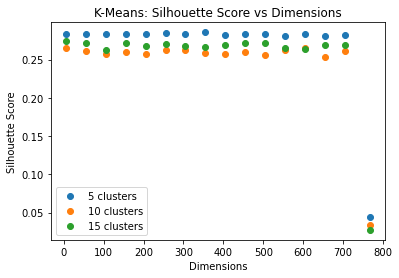

In [16]:
# visualize the model scores
plt.scatter(select_dims_5, select_scores_5)
plt.scatter(select_dims_10, select_scores_10)
plt.scatter(select_dims_15, select_scores_15)
plt.legend(["5 clusters", "10 clusters", "15 clusters"])
plt.title("K-Means: Silhouette Score vs Dimensions")
plt.ylabel("Silhouette Score")
plt.xlabel("Dimensions")
plt.show()

In [17]:
# pick the best performing model
model = cluster_models[(5, 5)]


In [18]:
reduce_dim_model = dim_reduce_models[5]

In [19]:
reduced_embeddings = reduce_dim_model.transform(embeddings)
clusters = model.predict(reduced_embeddings)

In [20]:
# # reduce dimensions to 5 using umap
# lower_dim = 100
# reduced_embeddings, reduce_dim_model = reduce_dim(embeddings, "umap", lower_dim)
# # reduced_embeddings = embeddings
# # cluster
# cluster_algorithm = "kmeans" # dbscan/gmm

# clusters, model = cluster_and_predict(reduced_embeddings, cluster_algorithm, num_cluster=10)
# # saving_path = "outputs/dim_200"
# # os.makedirs(saving_path, exist_ok=True)
# # models, losses = train_cluster(reduced_embeddings, cluster_algorithm, "sil", range(2, 40, 3), saving_path=saving_path)

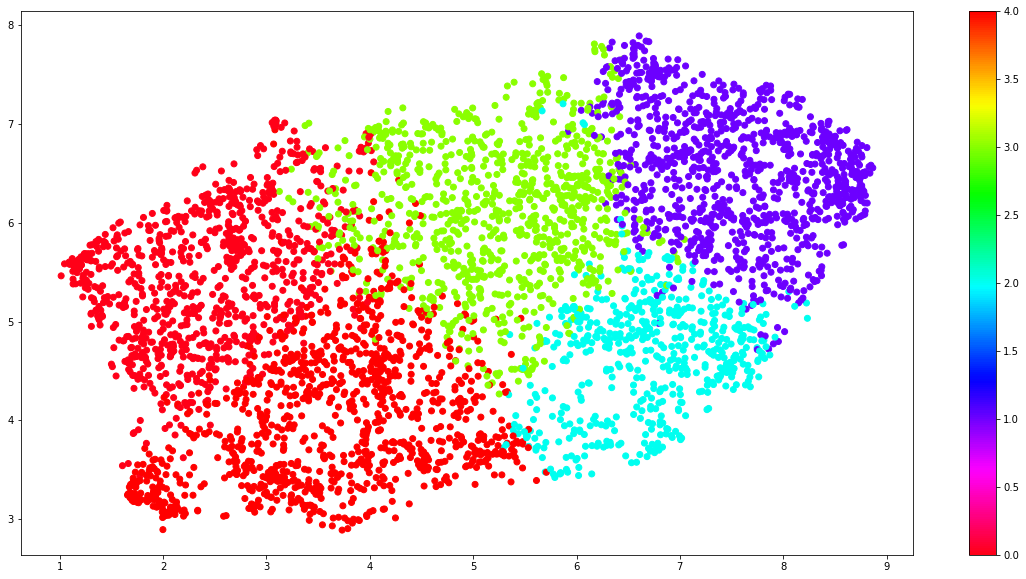

In [21]:
if cluster_algorithm == "gmm":
    paper_labels = clusters
elif cluster_algorithm == "kmeans":
    paper_labels = clusters
elif cluster_algorithm == "dbscan":
    paper_labels = clusters.labels_

# for dbscan
# visualize(embeddings, clusters.labels_)

# for gmm
visualize(embeddings, paper_labels)


In [22]:
dic = {}
# for dbscan
# dic = metrics(["sil"], reduced_embeddings, clusters.labels_, dic)

# for gmm
dic = metrics(["sil"], reduced_embeddings, paper_labels, dic)

print(dic)

{'sil': 0.2833341}


In [23]:
scores

{(-1, 5): 0.04396787,
 (-1, 10): 0.033583913,
 (-1, 15): 0.027335104,
 (5, 5): 0.2833341,
 (5, 10): 0.26559797,
 (5, 15): 0.27483356,
 (55, 5): 0.28339365,
 (55, 10): 0.2613303,
 (55, 15): 0.2710046,
 (105, 5): 0.28276,
 (105, 10): 0.2569587,
 (105, 15): 0.26243556,
 (155, 5): 0.28351828,
 (155, 10): 0.26003262,
 (155, 15): 0.27198112,
 (205, 5): 0.28337806,
 (205, 10): 0.25665733,
 (205, 15): 0.26772842,
 (255, 5): 0.28440827,
 (255, 10): 0.26213083,
 (255, 15): 0.27032205,
 (305, 5): 0.2835619,
 (305, 10): 0.26187035,
 (305, 15): 0.26797247,
 (355, 5): 0.2857014,
 (355, 10): 0.25840676,
 (355, 15): 0.2663622,
 (405, 5): 0.2825427,
 (405, 10): 0.2577189,
 (405, 15): 0.2694993,
 (455, 5): 0.28331503,
 (455, 10): 0.25963533,
 (455, 15): 0.27119264,
 (505, 5): 0.28279284,
 (505, 10): 0.25637898,
 (505, 15): 0.2711239,
 (555, 5): 0.2808258,
 (555, 10): 0.26189026,
 (555, 15): 0.2649795,
 (605, 5): 0.2828047,
 (605, 10): 0.26451534,
 (605, 15): 0.2637515,
 (655, 5): 0.28046334,
 (655, 10):

#### Provide an overview of the topics

In [24]:
nips_df, docs_per_topic = create_docs_per_topic(nips_df, paper_labels)

tf_idf, count = c_tf_idf(docs_per_topic.abstract.values, m=len(nips_df))

top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)
topic_sizes = extract_topic_sizes(nips_df); topic_sizes.head(10)

,Topic,Size
4,4,1089
1,1,1001
3,3,939
0,0,914
2,2,564


In [25]:
print(topic_sizes)

   Topic  Size
4      4  1089
1      1  1001
3      3   939
0      0   914
2      2   564


In [26]:
top_n_words[4][:10]

[('agent', 0.006468448828225028),
 ('policy', 0.006113569850090786),
 ('reinforcement', 0.006004967972340869),
 ('tasks', 0.005998280456614235),
 ('rl', 0.005951113315221767),
 ('task', 0.005731366658491771),
 ('human', 0.005499233558366051),
 ('adversarial', 0.005492413901314562),
 ('agents', 0.005173888345253284),
 ('training', 0.005018854938789691)]

In [27]:
top_n_words[1][:10]

[('convex', 0.009297853692475645),
 ('convergence', 0.008966476695711125),
 ('gradient', 0.008602404408767278),
 ('stochastic', 0.008271534063236496),
 ('bounds', 0.008002219815413214),
 ('descent', 0.00722485486250305),
 ('bound', 0.007219481592048855),
 ('optimization', 0.007215644914121493),
 ('linear', 0.006938433341124399),
 ('non', 0.006937466157298806)]

In [28]:
top_n_words[3][:10]

[('graph', 0.008353566291523163),
 ('inference', 0.006399689888529385),
 ('networks', 0.0054830896718449495),
 ('variational', 0.00546394616983122),
 ('graphs', 0.005454282868347266),
 ('latent', 0.00513840812509116),
 ('deep', 0.005138052208766449),
 ('bayesian', 0.005011496740648761),
 ('neural', 0.004953773377445212),
 ('theoretical', 0.004861210570412224)]

In [29]:
top_n_words[0][:10]

[('image', 0.01004836221106529),
 ('3d', 0.009056505596292785),
 ('images', 0.007699209224569082),
 ('object', 0.007599499720769098),
 ('semantic', 0.006451644614092025),
 ('art', 0.006283398793753842),
 ('video', 0.00611607486079888),
 ('attention', 0.005886185914395135),
 ('text', 0.005669352791637793),
 ('state', 0.005496678738778399)]

In [30]:
top_n_words[2][:10]

[('regret', 0.016775905654125355),
 ('setting', 0.009259993595175917),
 ('policy', 0.008885641497449215),
 ('optimal', 0.00871316779011982),
 ('bandit', 0.008613636587273134),
 ('online', 0.008120139589573444),
 ('algorithms', 0.0078023048890033956),
 ('algorithm', 0.0076468581444357085),
 ('reward', 0.007541807111166079),
 ('bound', 0.007101010192324715)]

#### Accept a user input, Find the relevant cluster and suggests papers

In [31]:
# initialize Bert model for embedding
bert_model = BertForEmbedding()


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [32]:
nips_df.iloc[0]

Unnamed: 0                                                    0
title         Synthesized Policies for Transfer and Adaptati...
authors             Hexiang Hu, Liyu Chen, Boqing Gong, Fei Sha
abstract      The ability to transfer in reinforcement learn...
year                                                       2018
Topic                                                         4
Doc_ID                                                        0
Name: 0, dtype: object

In [33]:
sample_index = 30
sample_entry = nips_df.iloc[sample_index]
sample_entry["title"], sample_entry["abstract"]


("Adversarial Text Generation via Feature-Mover's Distance",
 "Generative adversarial networks (GANs) have achieved significant success in generating real-valued data. However, the discrete nature of text hinders the application of GAN to text-generation tasks. Instead of using the standard GAN objective, we propose to improve text-generation GAN via a novel approach inspired by optimal transport. Specifically, we consider matching the latent feature distributions of real and synthetic sentences using a novel metric, termed the feature-mover's distance (FMD). This formulation leads to a highly discriminative critic and easy-to-optimize objective, overcoming the mode-collapsing and brittle-training problems in existing methods. Extensive experiments are conducted on a variety of tasks to evaluate the proposed model empirically, including unconditional text generation, style transfer from non-parallel text, and unsupervised cipher cracking. The proposed model yields superior performance,

In [71]:
# use bert to verterize input
# sample_embedding = bert_model.bertify_single_abstract(sample_entry["abstract"])

# sample_embedding = bert_model.bertify_single_abstract("Value-function-based methods have long played an important role in reinforcement learning. However, finding the best next action given a value function of arbitrary complexity is nontrivial when the action space is too large for enumeration. We develop a framework for value-function-based deep reinforcement learning with a combinatorial action space, in which the action selection problem is explicitly formulated as a mixed-integer optimization problem. As a motivating example, we present an application of this framework to the capacitated vehicle routing problem (CVRP), a combinatorial optimization problem in which a set of locations must be covered by a single vehicle with limited capacity. On each instance, we model an action as the construction of a single route, and consider a deterministic policy which is improved through a simple policy iteration algorithm. Our approach is competitive with other reinforcement learning methods and achieves an average gap of 1.7% with state-of-the-art OR methods on standard library instances of medium size.")
# sample_embedding = bert_model.bertify_single_abstract("Deterministic-policy actor-critic algorithms for continuous control improve the actor by plugging its actions into the critic and ascending the action-value gradient, which is obtained by chaining the actor's Jacobian matrix with the gradient of the critic with respect to input actions. However, instead of gradients, the critic is, typically, only trained to accurately predict expected returns, which, on their own, are useless for policy optimization. In this paper, we propose MAGE, a model-based actor-critic algorithm, grounded in the theory of policy gradients, which explicitly learns the action-value gradient. MAGE backpropagates through the learned dynamics to compute gradient targets in temporal difference learning, leading to a critic tailored for policy improvement. On a set of MuJoCo continuous-control tasks, we demonstrate the efficiency of the algorithm in comparison to model-free and model-based state-of-the-art baselines.")
sample_embedding = bert_model.bertify_single_abstract("Image Generation")

sample_embedding.shape

torch.Size([1, 768])

In [72]:
sample_embedding = reduce_dim_model.transform(sample_embedding.cpu())

# (sample_embedding, "umap", lower_dim)
sample_class = model.predict(sample_embedding)

# sample_class = hdbscan.approximate_predict(clusters, sample_embedding)[0]
# sample_class = np.array(4)
print(f"The predicted cluster is: {sample_class}")
top_n_words[sample_class.item()][:10]

The predicted cluster is: [0]


[('image', 0.01004836221106529),
 ('3d', 0.009056505596292785),
 ('images', 0.007699209224569082),
 ('object', 0.007599499720769098),
 ('semantic', 0.006451644614092025),
 ('art', 0.006283398793753842),
 ('video', 0.00611607486079888),
 ('attention', 0.005886185914395135),
 ('text', 0.005669352791637793),
 ('state', 0.005496678738778399)]

In [64]:
# x = embeddings[10]
# x_class = paper_labels[10]
# x_class

In [65]:
sample_embedding

array([[6.253234 , 5.177466 , 9.948315 , 4.0384464, 4.5136347]],
      dtype=float32)

In [66]:
relevant_embeddings, relevant_df = select_cluster(sample_class, reduced_embeddings, nips_df, paper_labels)

# relevant_embeddings, relevant_df = select_cluster(sample_class, embeddings, nips_df, paper_labels)
relevant_embeddings = reduced_embeddings
relevant_df = nips_df
scores = cos_sim(sample_embedding, relevant_embeddings)
best_matches = np.argsort(scores)[-20:][::-1]
for i, match_idx in enumerate(best_matches):
  print(f"score: {scores[match_idx]}")
  print(f"title: {relevant_df.iloc[match_idx]['title']}")
  print(f"abstract: {relevant_df.iloc[match_idx]['abstract']}")

score: 0.9999775290489197
title: A Deep Bayesian Policy Reuse Approach Against Non-Stationary Agents
abstract: In multiagent domains, coping with non-stationary agents that change behaviors from time to time is a challenging problem, where an agent is usually required to be able to quickly detect the other agent's policy during online interaction, and then adapt its own policy accordingly. This paper studies efficient policy detecting and reusing techniques when playing against non-stationary agents in Markov games. We propose a new deep BPR+ algorithm by extending the recent BPR+ algorithm with a neural network as the value-function approximator. To detect policy accurately, we propose the \textit{rectified belief model} taking advantage of the \textit{opponent model} to infer the other agent's policy from reward signals and its behaviors. Instead of directly storing individual policies as BPR+, we introduce \textit{distilled policy network} that serves as the policy library in BPR+, 

In [ ]:
np.min(scores)

0.25961098